In [2]:
! pip install accelerate diffusers controlnet_aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [14]:
import torch
from controlnet_aux import CannyDetector
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image,make_image_grid

In [15]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16,
    varient="fp16")

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "Yntec/AbsoluteReality",
    controlnet=controlnet,
    torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [16]:
pipe.load_ip_adapter("h94/IP-Adapter",
                     subfolder="models",
                     weight_name="ip-adapter_sd15.bin")

pipe.enable_model_cpu_offload()

In [6]:
from google.colab import files
files.upload()

print("upload is done")

Saving style_input.jpg to style_input.jpg
Saving 2024-miyazaki-hayao.jpg to 2024-miyazaki-hayao.jpg
upload is done


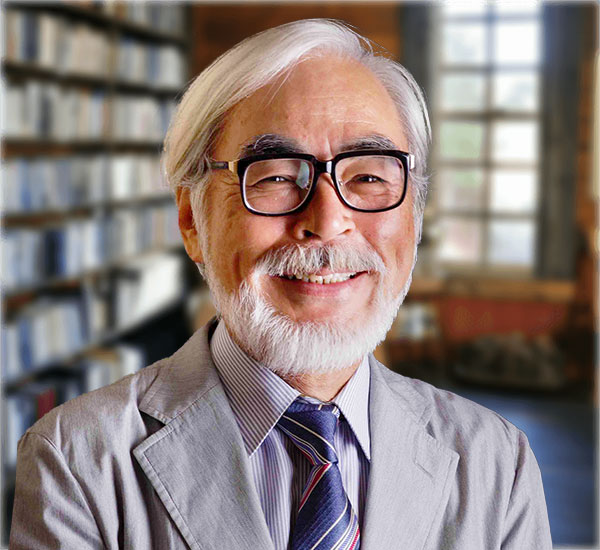

In [17]:
img = load_image("2024-miyazaki-hayao.jpg")
img

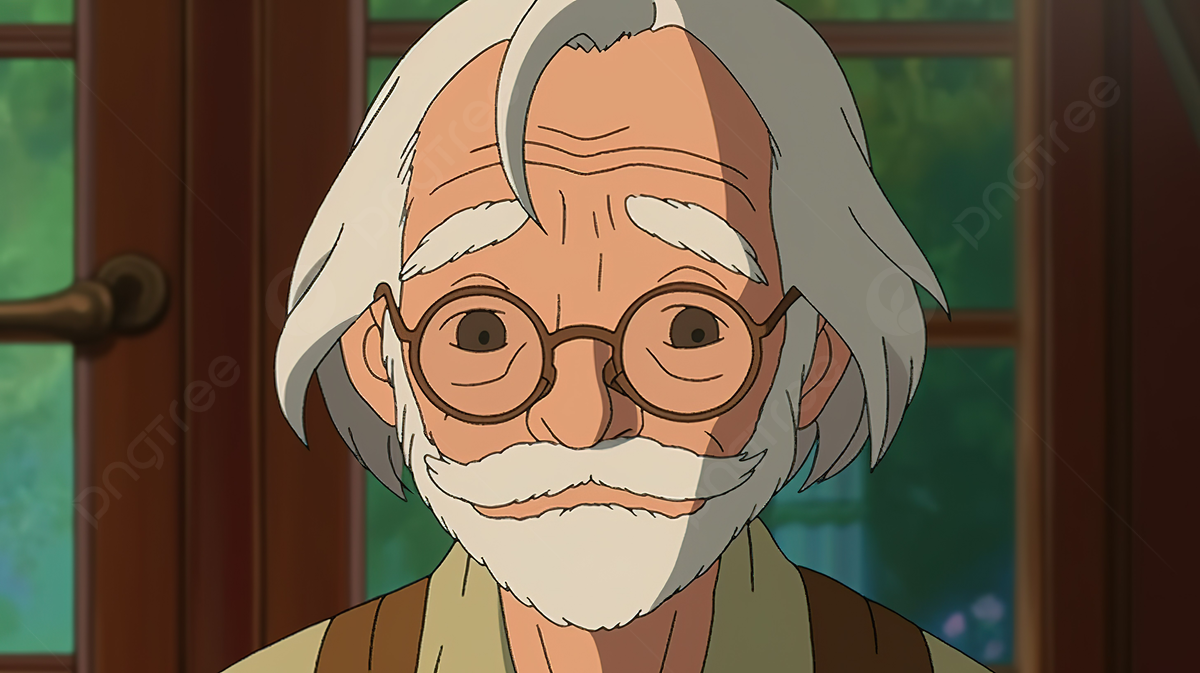

In [18]:
ip_adap_img = load_image("style_input.jpg")

ip_adap_img

### Important step

This will fill the image with style image's colors

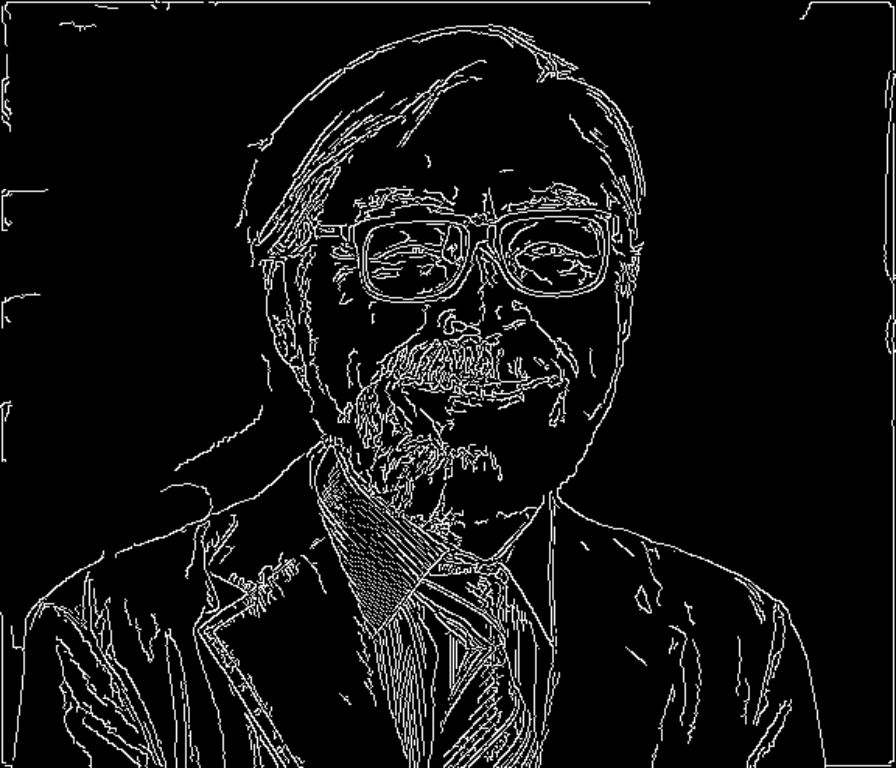

In [19]:
canny = CannyDetector()
canny_img = canny(img,detect_resolution=512,image_resolution=768)
canny_img

In [20]:
prompt = """
(photorealistic:1.2), raw, masterpiece, high quality,
8k, anime style, ghibli-like, white hair,white beard"""

pipe.set_ip_adapter_scale(0.5)

images = pipe(prompt = prompt,
              negative_prompt = "low quality",
              height = 768,
              width = 768,
              ip_adapter_image = ip_adap_img,
              image = canny_img,
              guidance_scale = 6,
              controlnet_conditioning_scale = 0.7,
              num_inference_steps = 20,
              num_images_per_prompt = 3).images

  0%|          | 0/20 [00:00<?, ?it/s]

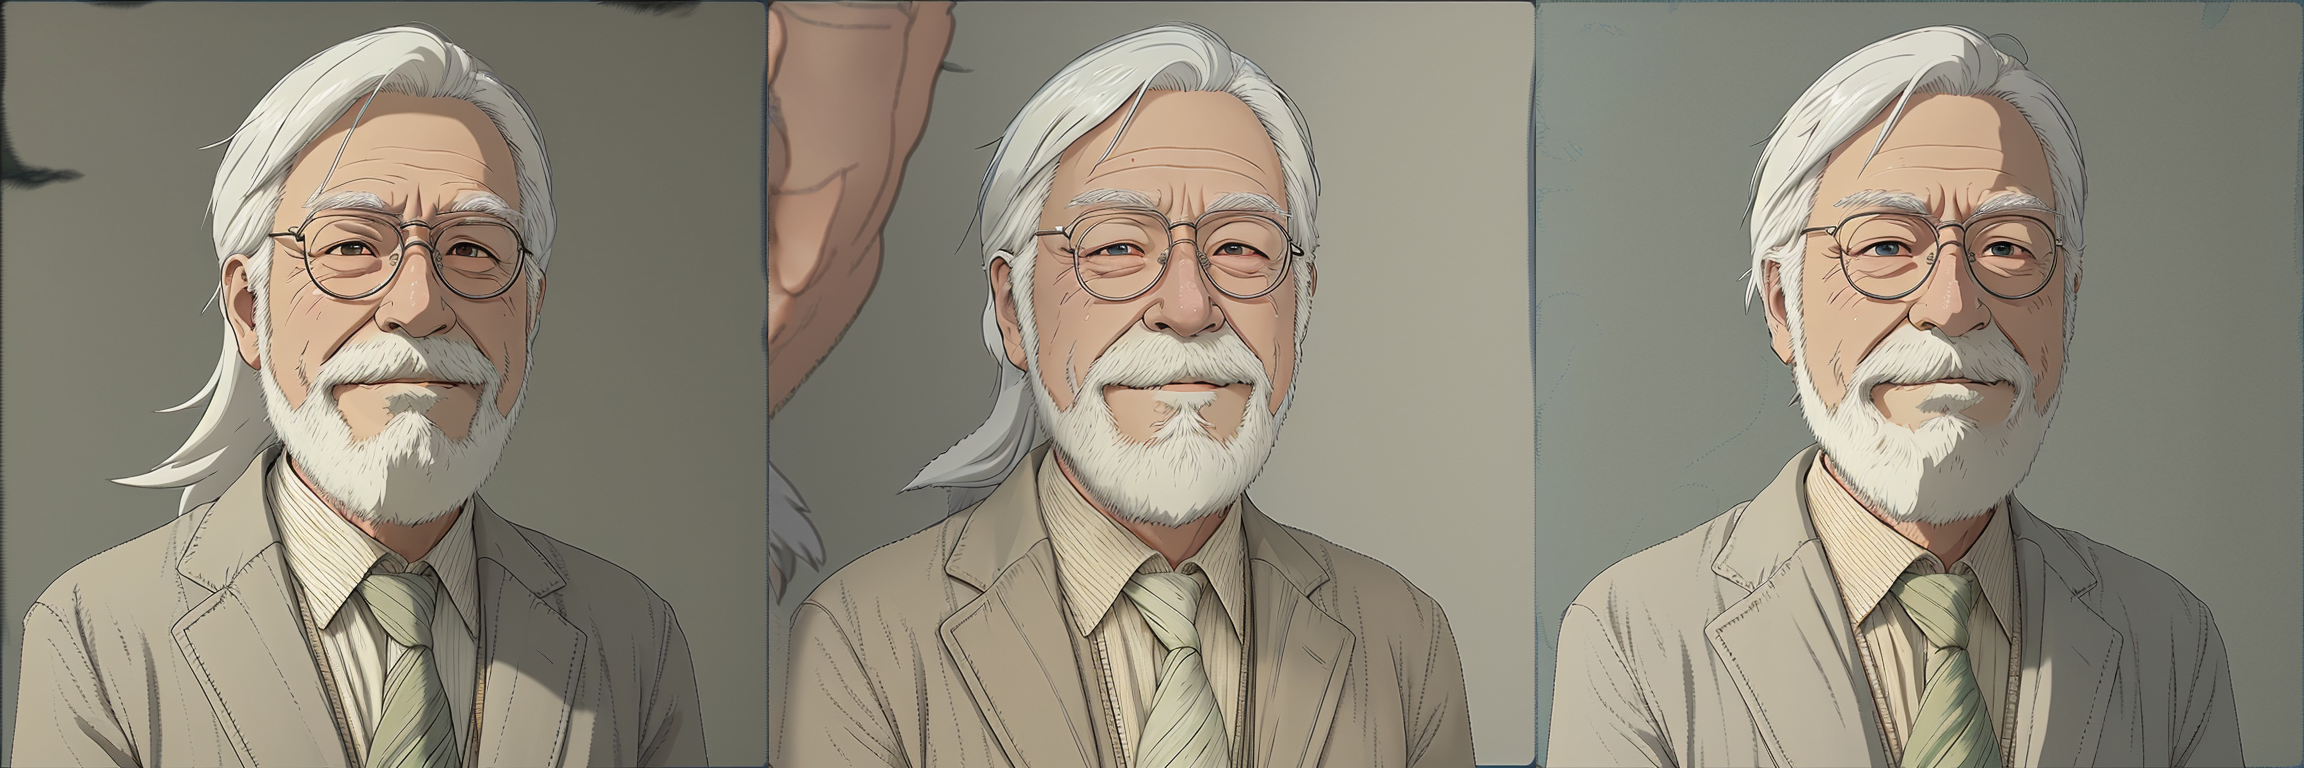

In [21]:
make_image_grid(images,cols=3,rows=1)